Distribution of Target Variable

In machine learning, especially in classification problems, the balance between classes is important. If one class is overrepresented, models might become biased towards predicting that class. The visualization helps in identifying if such an imbalance exists.

The bar plot shows the proportion or percentage of the dataset that falls into each category. This is visually represented by the height of each bar.This visualization provides a quick understanding of what kind of data you're dealing with – predominantly disaster-related tweets, non-disaster-related tweets, or a balanced mix of both.

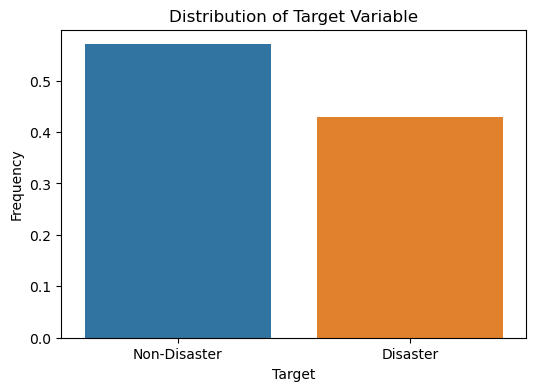

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

# Loading the dataset
file_path = 'train.csv'
data = pd.read_csv(file_path)
missing_values = data.isnull().sum()
target_distribution = data['target'].value_counts(normalize=True)

# Plotting the distribtion of the target variable
plt.figure(figsize=(6, 4))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Disaster', 'Disaster'])
plt.show()


Top 25 Most common Keywords:
This graph helps us quickly recognize the main topics or themes prevalent in the tweets, such as specific types of disasters or related actions. This may include keywords such as Earthquake, Floods, Outbreak etc.

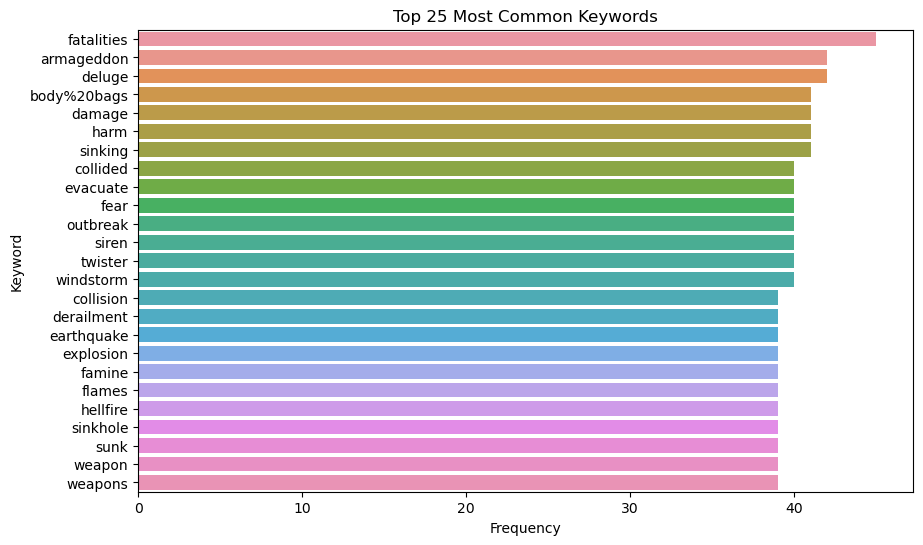

In [69]:
# Analyzing the frequency and distribution of keywords
# Removing NaN values for keyword analysis
keyword_counts = Counter(data['keyword'].dropna()) 
most_common_keywords = keyword_counts.most_common(25)
keywords_df = pd.DataFrame(most_common_keywords, columns=['Keyword', 'Frequency'])

# Plotting the frequency of the 25 most common keywords
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Keyword', data=keywords_df)
plt.title('Top 25 Most Common Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

Text Length Analysis:

The average length of a tweet in the dataset is approximately 101 characters.
The histogram of text lengths shows a fairly wide distribution, with most tweets having lengths between 50 and 150 characters. This indicates a variety of expression lengths in the dataset, which is typical for Twitter.

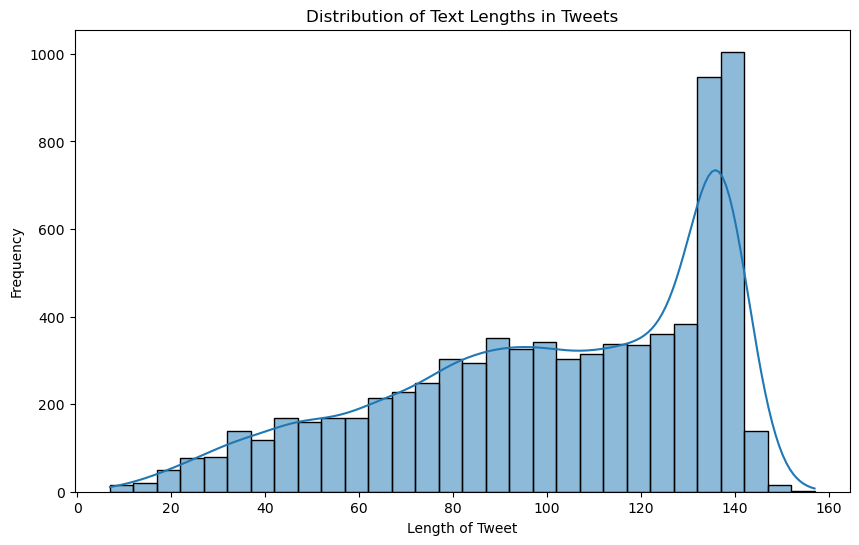

In [70]:
# Exploring the average length of tweets
data['text_length'] = data['text'].apply(len)
avg_text_length = np.mean(data['text_length'])

# Visualiation of text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths in Tweets')
plt.xlabel('Length of Tweet')
plt.ylabel('Frequency')
plt.show()

Unigrams Analysis:

In the Context of Disaster-Related Tweets: The unigrams in this dataset would likely include key words that are frequently associated with disasters.
Expected Insights: Words such as "earthquake," "flood," "fire," "storm," etc., could be common. Additionally, terms like "help," "rescue," or "evacuate" might also appear frequently, indicating actions or responses related to disasters.
Purpose: Identifying these unigrams helps understand the most dominant themes or elements of discussion in the dataset, shedding light on the types of disasters most commonly referenced or the nature of the discourse surrounding them.

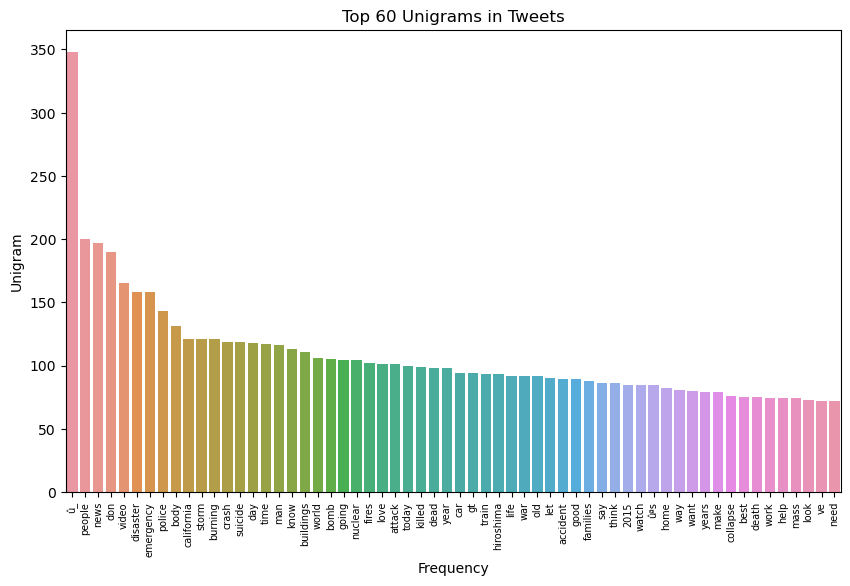

In [71]:
# Writing a single function to define ngrams
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    # Adding custom stop words
    custom_stop_words = text.ENGLISH_STOP_WORDS.union(['http', 'https', 'co', 'rt', 'amp','like','new','just',
                                                       'did','lol','got'])
    vec = CountVectorizer(stop_words=custom_stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items() if 'youtube' not in word]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 25 Unigrams
top_unigrams = get_top_ngrams(data['text'], n=60, ngram_range=(1, 1))
unigrams_df = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])

# Plotting Unigrams
plt.figure(figsize=(10, 6))
sns.barplot(x='Unigram', y='Frequency', data=unigrams_df)
plt.xticks(rotation=90, fontsize=7)
plt.title('Top 60 Unigrams in Tweets')
plt.xlabel('Frequency')
plt.ylabel('Unigram')
plt.show()

Bigrams Analysis:

In the Context of Disaster-Related Tweets: Bigrams provide a better context than unigrams, as they combine two words to form a more meaningful phrase.
Expected Insights: Phrases like “emergency response,” “severe flooding,” “rescue operations,” or “damage assessment” could be prevalent. These phrases can indicate not just the type of disaster, but also the kind of responses and situations that are commonly talked about in the context of these events.
Purpose: This analysis can be particularly useful for understanding how people talk about disasters on social media, including the types of assistance or information they seek or provide.

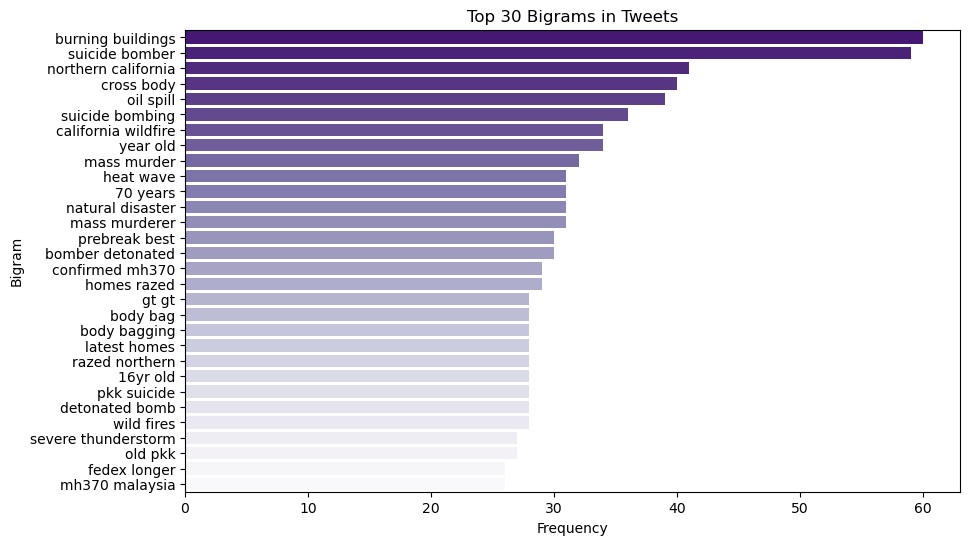

In [72]:
# Top 10 Bigrams
top_bigrams = get_top_ngrams(data['text'], n=30, ngram_range=(2, 2))
bigrams_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

# Plotting Bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=bigrams_df, palette=sns.color_palette("Purples_r", len(bigrams_df)))
plt.title('Top 30 Bigrams in Tweets')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

Trigrams Analysis:

In the Context of Disaster-Related Tweets: Trigrams offer even more context by analyzing sequences of three words.
Expected Insights: We might see trigrams like “need immediate medical help,” “heavy rain flood warning,” or “earthquake hit last night.” Such phrases can provide a detailed glimpse into the specific situations or concerns being expressed in the tweets.
Purpose: Trigram analysis is valuable for capturing detailed narratives or specific aspects of disaster communication. It can reveal nuanced themes such as urgency, specific locations of incidents, or particular types of assistance needed.

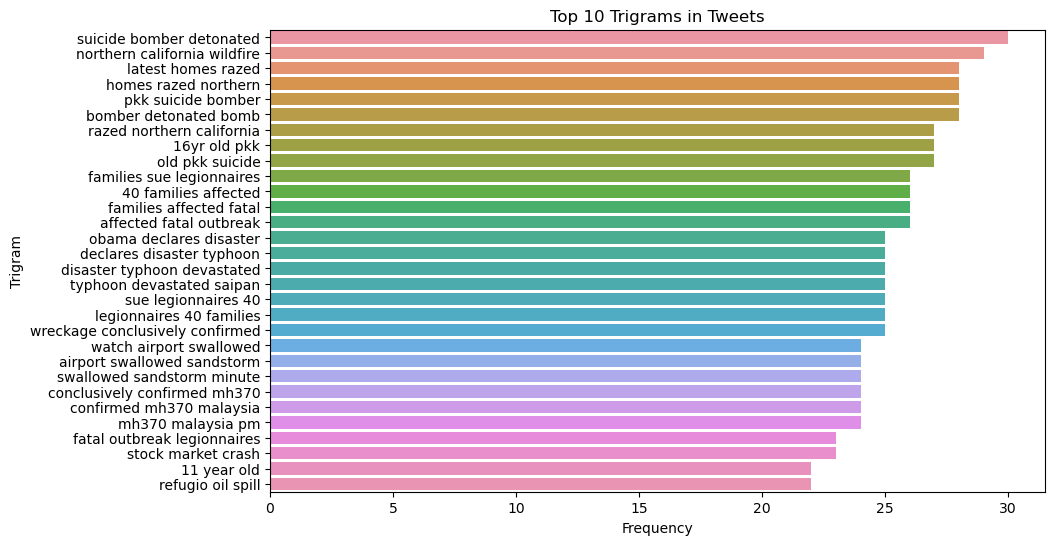

In [73]:
# Top 30 Trigrams
top_trigrams = get_top_ngrams(data['text'], n=30, ngram_range=(3, 3))
trigrams_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

# Plotting Trigrams
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Trigram', data=trigrams_df)
plt.title('Top 10 Trigrams in Tweets')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

Top 20 Keywords by Class (Disaster vs Non-Disaster)

This visualization shows the distribution of the top 20 keywords in the dataset, differentiated by class (Disaster vs Non-Disaster).
The y-axis lists the keywords, while the x-axis indicates the count of each keyword.
The chart is color-coded to distinguish between disaster and non-disaster tweets.
This visualization is useful for understanding which keywords are most common in each category and how they differ between the two classes.


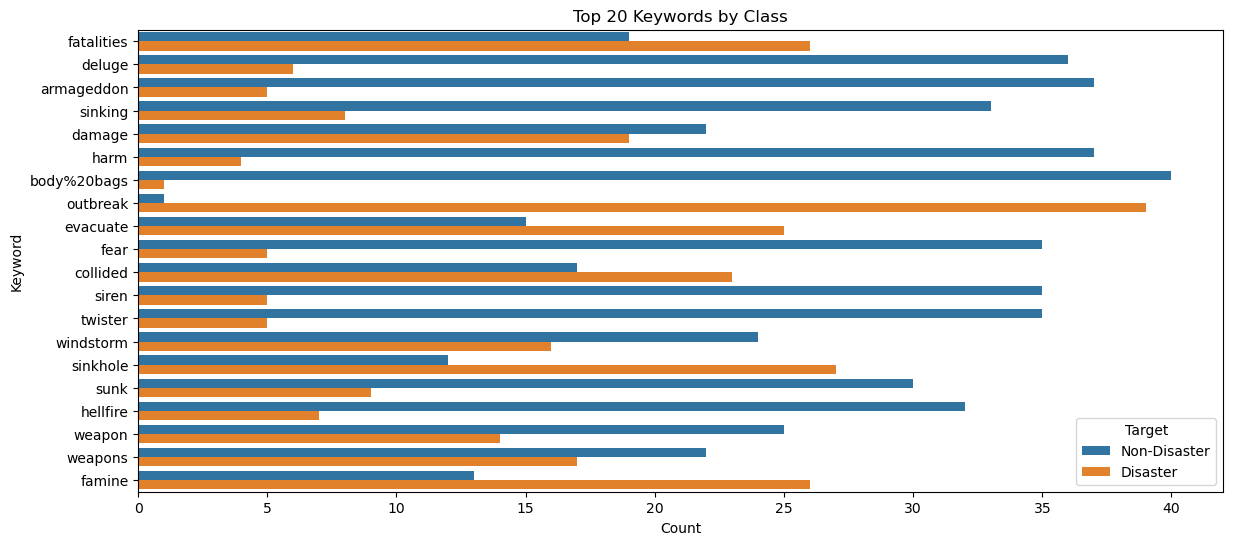

In [74]:
data['text_length'] = data['text'].apply(len)
data['word_count'] = data['text'].apply(lambda x: len(x.split()))

# Visualiation of the distribution of keywords for each clas
plt.figure(figsize=(14, 6))
sns.countplot(y='keyword', hue='target', data=data, order=data['keyword'].value_counts().iloc[:20].index)
plt.title('Top 20 Keywords by Class')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.legend(title='Target', labels=['Non-Disaster', 'Disaster'])
plt.show()




Average Tweet Length by Class (Disaster vs Non-Disaster)

This bar chart compares the average length of tweets between disaster and non-disaster classes.
The x-axis represents the target classes (0 for Non-Disaster, 1 for Disaster), and the y-axis shows the average length of tweets in each class.
This visualization can help determine if there's a significant difference in the length of tweets based on their classification, which could be a useful feature for modeling.


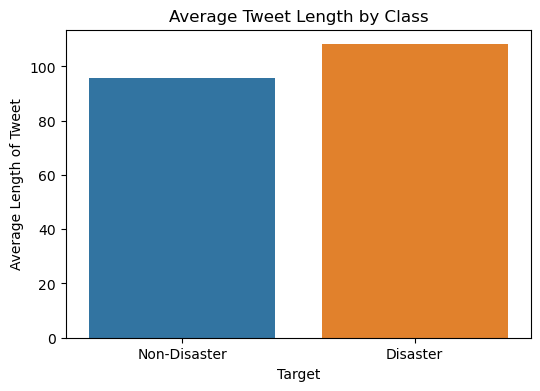

In [75]:
# Visualization of the average tweet length for each class 
avg_length_by_class = data.groupby('target')['text_length'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_length_by_class.index, y=avg_length_by_class.values)
plt.title('Average Tweet Length by Class')
plt.xlabel('Target')
plt.ylabel('Average Length of Tweet')
plt.xticks([0, 1], ['Non-Disaster', 'Disaster'])
plt.show()


Distribution of Word Count in Tweets

This histogram displays the distribution of word counts in the tweets.
The x-axis represents the word count, and the y-axis shows the frequency of tweets with a particular word count.
The histogram, highlights the range and commonality of word counts in tweets.
This visualization provides insights into the verbosity of tweets and whether tweets related to disasters tend to be longer or shorter in word count.

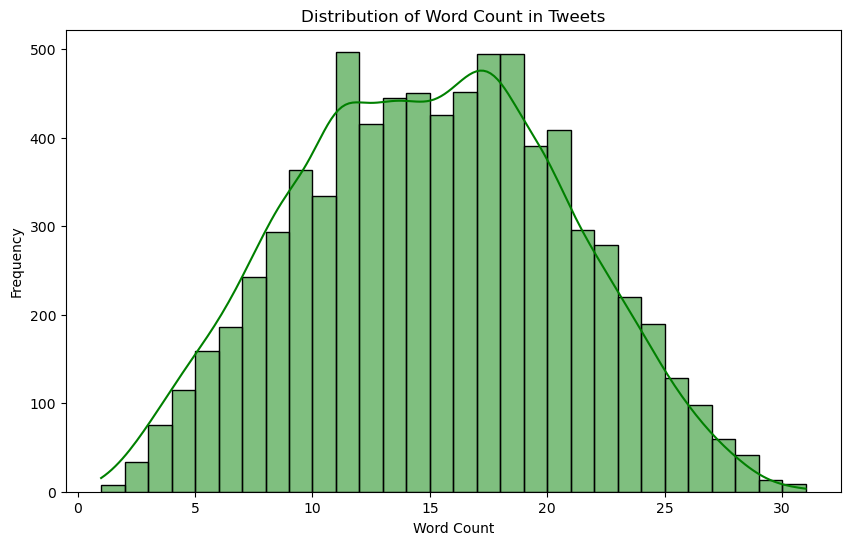

In [76]:

# Visualization of word count distribution in tweets
plt.figure(figsize=(10, 6))
sns.histplot(data['word_count'], bins=30, kde=True, color='green')
plt.title('Distribution of Word Count in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

Correlation Heatmap between Numeric Features

This heatmap displays the correlation between the numeric features: text length, word count, and target.
The colors represent the strength and direction of the correlations, with warmer colors indicating stronger positive correlations and cooler colors indicating stronger negative correlations.
This visualization is useful for identifying potential relationships between variables, which can be important for feature selection and understanding the dataset's structure.

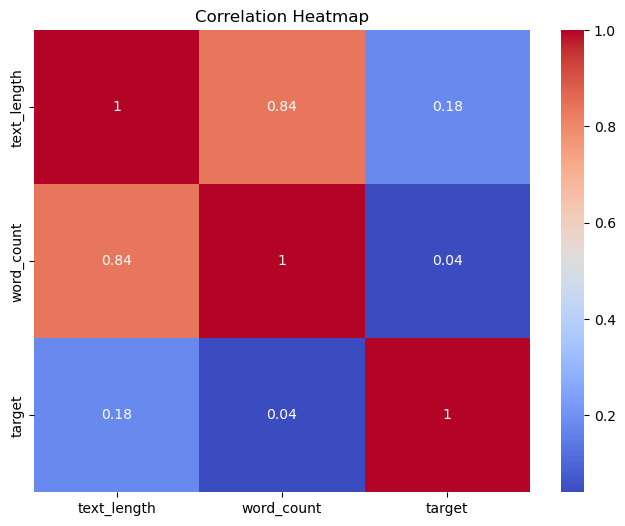

In [77]:
correlation_matrix = data[['text_length', 'word_count', 'target']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Boxplot of Tweet Text Length by Target Category
This boxplot compares the distribution of tweet text lengths between disaster and non-disaster tweets.
The x-axis represents the target categories, and the y-axis shows the text length.
This visualization provides insights into whether the length of tweets varies significantly between the two classes. Boxplots offer a clear view of the median and outliers in the data.

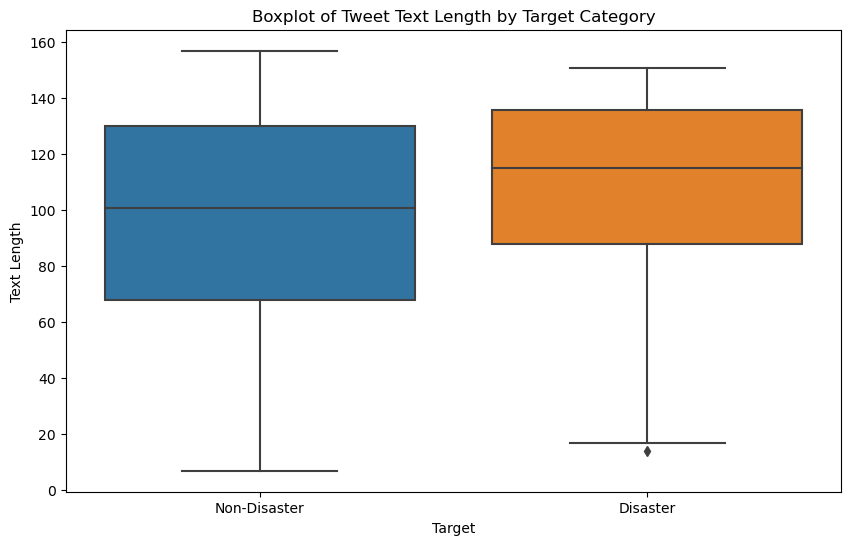

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='text_length', data=data)
plt.title('Boxplot of Tweet Text Length by Target Category')
plt.xlabel('Target')
plt.ylabel('Text Length')
plt.xticks([0, 1], ['Non-Disaster', 'Disaster'])
plt.show()

Word Cloud for Disaster Tweets

This word cloud visualizes the most frequent words found in disaster-related tweets.
The size of each word in the cloud represents its frequency in the dataset.
Word clouds provide a quick and visually appealing way to understand the common themes and topics in a particular subset of text data.

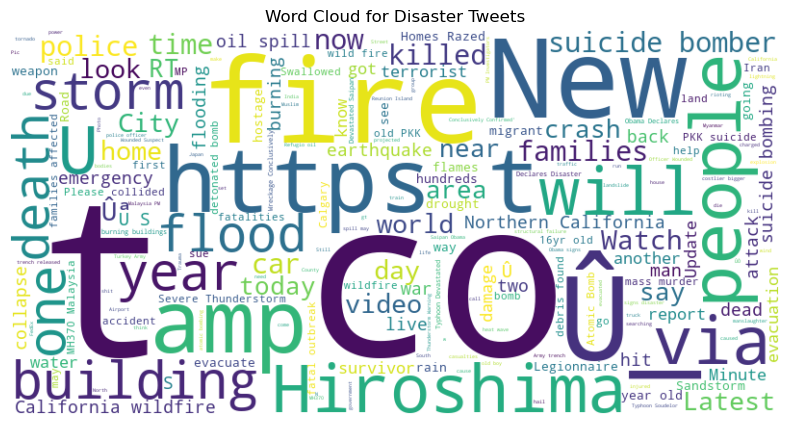

In [79]:
from wordcloud import WordCloud
disaster_tweets = data[data['target'] == 1]['text']
disaster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(disaster_tweets))
plt.figure(figsize=(10, 5))
plt.imshow(disaster_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Disaster Tweets')
plt.show()